# Vaccine Project

By: Eli Ingleson and Imani Thompson

### Overview

This project analyses data to figure out whether an individual has or has not received their seasonal flu vaccine. Using the 2009 National H1N1 Flu Survey (NHFS) from DrivenData, we will conduct a binary classification model. Our final model has a 75% accuracy score. We recommend the Community Outreach Program to focus on targeting middle aged people to get vaccinated and to also make shots more available for people with lower incomes.

### Business Understanding

Our stakeholder is the Community Outreach Program and they are concerned with the increasing rate of flu cases in the area. We are a non profit organization working to find out who hasn't recieved their seasonal flu shot based on backgrounds, opinions, and health behaviors. We will also be predicting the features that are most correlated with indivduals flu shot status. Deciding whether or not someone has had a flu shot will require a binary classificaton model. A false positive in this model would be we predict that an individual recieved a flu vacine but they didn't. A false negative in this model would be that we predict an individual recieved no vaccine but they did.  A false positive in this context would be the worst senario for the Community Outreach Program. We are going to be focusing on decreasing the amount of false postives within this model. 

### Data Understanding

This data is from Driven Data and it comes from the 2009 National H1N1 Flu Survey (NHFS). Individuals 6 months and older are included in this dataset which takes in opinions, health behaviors and backgrounds. Overall this dataset is related to the data analysis questions because it holds all the necessary information to determine who is or is not likly to get vaccinated. The target variable is the seasonal vaccination status. Other variables within this dataset is race, sex, employment status, income status, education level, age group, health insurance, etc. The properties of the variables we intended to use are numerical and categorical. 

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB, GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
# Reading in a csv file using pandas
features =pd.read_csv('../../../../Downloads/Data/training_set_features.csv')
labels =pd.read_csv('../../../../Downloads/Data/training_set_labels.csv')

In [3]:
features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [5]:
# Shows information about the Dataframe
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [6]:
# Shows information about the Dataframe
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [7]:
# Description of numeric data in Dataframe
features.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [8]:
# Description of categorical data in Dataframe
features.describe(include='O')

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


In [9]:
# Description of numeric data in Dataframe
labels.describe()

,respondent_id,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000
mean,13353.000000,0.212454,0.465608
std,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000
75%,20029.500000,0.000000,1.000000
max,26706.000000,1.000000,1.000000


### Data Preparation

These dataset contain information about both H1N1 and Seasonal flu vaccines. We are only interested in the seasonal flu information so we will drop all other columns. We also took out all health behavioral columns becasue it doesn't really fit in with our original business question of who is most likely to recieve a vaccine.

In [10]:
#  Dropping all unnecessary columns from both datasets
labels =labels.drop(columns='h1n1_vaccine')

features2 =features.drop(columns=['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'employment_industry', 'employment_occupation', 'census_msa', 'hhs_geo_region'])

Since the only information we need from the `labels` dataset is `seasonal_vaccine`, we are going to take this column and move it into the `features2`

In [11]:
# Creating a new columns in features2 to add the seasonal_vaccine status to 
features2['vaccine_status'] = labels['seasonal_vaccine']

In [12]:
# Exploring the null values
features2.isna().sum()

respondent_id                0
doctor_recc_seasonal      2160
chronic_med_condition      971
child_under_6_months       820
health_worker              804
health_insurance         12274
age_group                    0
education                 1407
race                         0
sex                          0
income_poverty            4423
marital_status            1408
rent_or_own               2042
employment_status         1463
household_adults           249
household_children         249
vaccine_status               0
dtype: int64

In [13]:
# Filling health_insurance with 0.0
features2['health_insurance'] = features2['health_insurance'].fillna(0.0)
# Filling income_poverty with the mode
features2['income_poverty'].fillna('<= $75,000, Above Poverty', inplace=True)

In [14]:
# Dropping all null values
features2 = features2.dropna()
# Showings the total amount of nulls in dataset
features2.isna().sum().sum()

0

In [15]:
# Showing the cleaned dataset information
features2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 0 to 26706
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   respondent_id          22319 non-null  int64  
 1   doctor_recc_seasonal   22319 non-null  float64
 2   chronic_med_condition  22319 non-null  float64
 3   child_under_6_months   22319 non-null  float64
 4   health_worker          22319 non-null  float64
 5   health_insurance       22319 non-null  float64
 6   age_group              22319 non-null  object 
 7   education              22319 non-null  object 
 8   race                   22319 non-null  object 
 9   sex                    22319 non-null  object 
 10  income_poverty         22319 non-null  object 
 11  marital_status         22319 non-null  object 
 12  rent_or_own            22319 non-null  object 
 13  employment_status      22319 non-null  object 
 14  household_adults       22319 non-null  float64
 15  ho

In [16]:
# Replacing employment status value names to simplify
features2['employment_status'] = features2['employment_status'].replace('Not in Labor Force', 'Unemployed')
# Replacing income poverty value names to simplify
features2['income_poverty'] = features2['income_poverty'].replace('> $75,000', 'Below Poverty').replace('<= $75,000, Above Poverty','Above Poverty' )

### Modeling

To arrive at an intial approach, we are going to analysis our data by first conducting a train test split. Once we have split our data, we will run another train test split to set aside our holding data. We are dealig with both numerical and categorical data so column transformers, piplines, and more will be necessary to use. Binary model types are appropraite given the business problesm so the models that we will build are Logistic Regression, Decision Tree Classifier,Naive Bayes, KNN, Gradient Boosting, and a Decision Tree with a grid search. We also used a Recursive Feature Elimination(RFE) to select features.

### Evaluation

In [17]:
# Setting our X and y variables
X = features2.drop(columns='vaccine_status')
y = features2['vaccine_status']
# Preparing our hold out data for train test split
X_cols = X.columns
X, X_hold, y, y_hold = train_test_split(X, y, random_state=42, test_size=.05)
# Regular train test split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

#### Baseline Understanding

In [20]:
# Showings the probablities of vaccination status
y_train.value_counts(normalize=True)

0    0.519809
1    0.480191
Name: vaccine_status, dtype: float64

In [29]:
# Making predicts using baseline model
preds = [0] * len(y_train)
preds_test = [0] * len(y_test)
# Showing us the accuracy score for modelless baseline
print(f' Accuracy score of train data {accuracy_score(y_train, preds)}')
print('*' *48)
print(f' Accuracy score of test data {accuracy_score(y_test, preds_test)}')

 Accuracy score of train data 0.5198088290781033
************************************************
 Accuracy score of test data 0.5306545934729296


A modelless baseline is just taking the majority of the two possibility. For our baseline model, our majority is people do not have their seasonal vaccination. Because it is majority, the easiest way to determine the status of individuals is to assume every person we come in contact with is not vaccinated. Since our binary catgories are nicely balanced, it is appropraite to use accuracy as our metric for interperting our model. Based on the accuracy score of the train and test data, this baseline is slightly underfit. The score of the modeless based line is 51.9% but scored on unseen data it is 53.1%.

#### Models

Before we build our first model we have to separate the numeric columns from the catergorical columns. We used `OneHotEncoder`on our categorical columns and `StandardScalers` on our numerical columns. Both of these will be used on the `ColumnTransformer`

In [32]:
# Grouping categorical columns
cat_columns = [c for c in X_train.columns if X_train[c].dtype == 'O']
# Grouping numerical columns
num_columns = [c for c in X_train.columns if X_train[c].dtype in ['int64', 'float64']]
# Combining the numerical and categorical columns 
used_cols = [*cat_columns, *num_columns]

# Instantiating OneHotEncoder(ohe)
cat_transformer = OneHotEncoder(drop='first')
# Instantiating StandardScaler
num_transformer = StandardScaler()

# Instantiating ColumnTransformer
preprocessor = ColumnTransformer([
    ('cats', cat_transformer, cat_columns),
    ('nums', num_transformer, num_columns)
])

In [33]:
# Function to show train and test accuracy scores
def evaluate(model, Xtr, Xte, ytr, yte):
    train_preds = model.predict(Xtr)
    test_preds = model.predict(Xte)

    train_probas = model.predict_proba(Xtr)[:,1]
    test_probas = model.predict_proba(Xte)[:,1]
    
    plot_confusion_matrix(model, Xte, yte)
    
    plot_roc_curve(model, Xte, yte)
    
    print(f"Train Accuracy: {accuracy_score(y_train, train_preds):.4f}")
    print("*" * 20)
    print(f"Test Accuracy: {accuracy_score(y_test, test_preds):.4f}")
    

##### Logistic Regression

Train Accuracy: 0.7054
********************
Test Accuracy: 0.7136


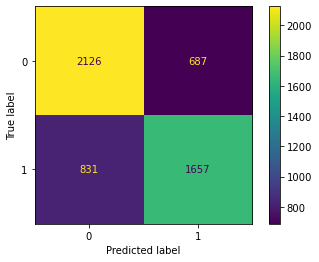

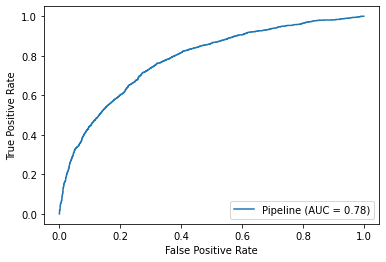

In [34]:
# Using pipline to instantiate Logistic Regression 
lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression())
])

# Fitting model onto train data
lr.fit(X_train[used_cols], y_train)

# Getting score, confusion matrix, and graph
evaluate(lr, X_train[used_cols], X_test[used_cols], y_train, y_test)

This Logistic Regression model has a train accuracy score of 70.5% and a test accuracy score of 71.3%. This model is slightly underfit. This Logistic model is indeed better than the baseline model since it takes in all possibilies, such as true positives, true negative, false positives, and false negatives. This model also has a AUC of 0.78.

##### Decision Tree

Train Accuracy: 0.7500
********************
Test Accuracy: 0.7006


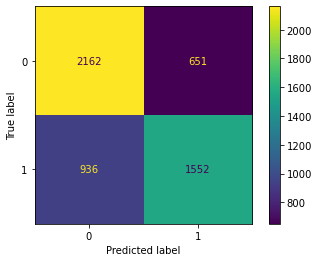

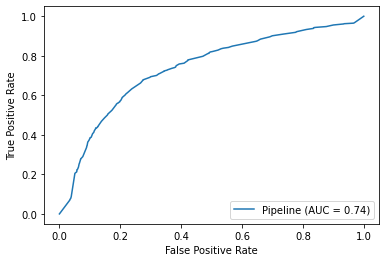

In [35]:
# Using pipline to instantiate Decision Tree
dt = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(random_state=42, max_depth=10))
])
# Fitting model onto training data
dt.fit(X_train[used_cols], y_train)

# Making predictions on train and test data
train_preds = dt.predict(X_train[used_cols])
test_preds = dt.predict(X_test[used_cols])

# Calulating predict proba for both train and test
train_probas = dt.predict_proba(X_train[used_cols])[:,1]
test_probas = dt.predict_proba(X_test[used_cols])[:,1]

# Getting score, confusion matrix, and graph
evaluate(dt, X_train[used_cols], X_test[used_cols], y_train, y_test)

This Decision Tree model has a train accuracy score of 75% with a test accuracy score of 70%. This model has highest accuracy scores compared to the baseline model but it is still not better, this is because of the big difference between the training and testing scores. This Decision Tree is overfit.

##### Naive Bayes

Train Accuracy: 0.6803
********************
Test Accuracy: 0.6874


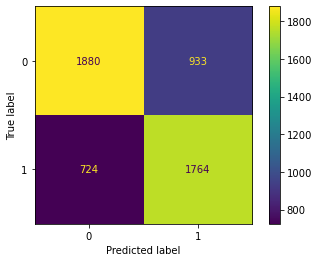

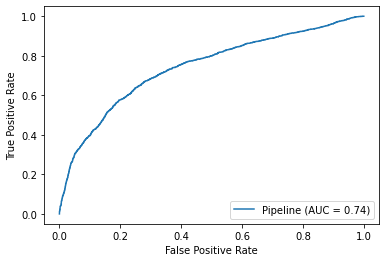

In [36]:
# Using pipline to instantiate Naive Bayes
nb = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('bayes', GaussianNB())
])
# Fitting our model on training data
nb.fit(X_train[used_cols], y_train)

# Getting score, confusion matrix, and graph
evaluate(nb, X_train[used_cols], X_test[used_cols], y_train, y_test)

This Naive Bayes model has a training accuracy score of 68% and a testing accuracy score of 68.7%. This scores are not the best between the other models so far but they do have the best deviaiton betweent the two scores. This model is slighty underfit but not enough to cause issues.

##### KNN

Train Accuracy: 0.7678
********************
Test Accuracy: 0.6763


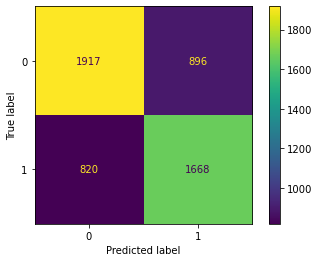

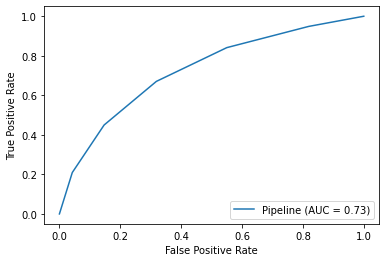

In [38]:
# Instantiating KNN and StandardScaler
knn = KNeighborsClassifier(n_neighbors=5)
scaler = StandardScaler()

# Using a pipline to instantiate StandardScaler, ohe, and ColumnTransformer
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])
preprocessor = ColumnTransformer(transformers = [
    ('num_transformer', num_transformer, num_columns),
    ('cat_transformer', cat_transformer, cat_columns)
])

# Using pipline to instantiate Naive Bayes
kn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', knn)
])
# Fitting model on training data
kn.fit(X_train[used_cols], y_train)
# Getting score, confusion matrix, and graph
evaluate(kn, X_train[used_cols], X_test[used_cols], y_train, y_test)

This KNN model has a training accuracy score of 76.7% and a testin acciracy score of 67.6%. This model does not fit our data well but it is very overfit. The deviation between these two scores are by far the worst out of all the models we have built up to this point.

##### Gradient Boosting Classifier

Train Accuracy: 0.6807
********************
Test Accuracy: 0.6955


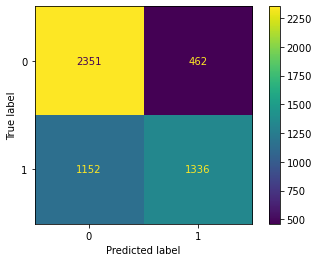

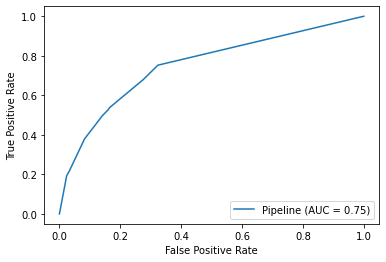

In [42]:
# Using pipline to instantiate Gradient Boosting Classifier
gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gb_sk',GradientBoostingClassifier(max_depth=2,n_estimators=10,random_state=42))
])
# Fitting model on training data
gb.fit(X_train[used_cols], y_train)
# Getting score, confusion matrix, and graph
evaluate(gb, X_train[used_cols], X_test[used_cols], y_train, y_test)

This Gradient Boosting Classifier model has a training accruacy score of 68% and a testing accuracy score of 69.5%. There is not a big difference in deivation between the two scores, so overall this model is not terrible.

Train Accuracy: 0.7097
********************
Test Accuracy: 0.7174


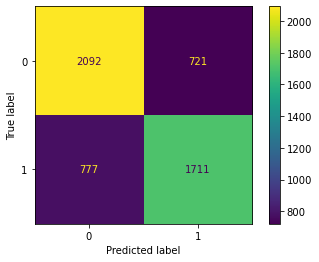

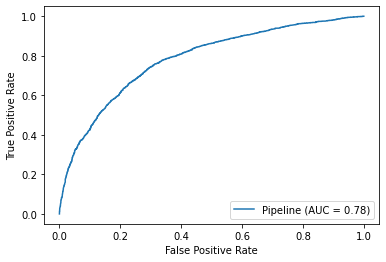

In [68]:
# Using a pipline to build the model
rfc = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('random', RandomForestClassifier(random_state =42, max_depth = 5))
])

# Fitting model on training data
rfc.fit(X_train[used_cols], y_train)
# Getting score, confusion matrix, and graph
evaluate(rfc, X_train[used_cols], X_test[used_cols], y_train, y_test)

This Random Forest Classifier has a training accuracy score of 71% and a testing accuracy score of 71.7%. These teo scores almost spot on and it fits our model well. This model is indeed better than the baseline model.

#### Final Model

In [75]:
# Using pipline to instantiate Decision Tree w/ grid search
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(random_state=42))
])

param_grid = {
    'tree__max_depth': [5, 14, 22],
    'tree__min_samples_leaf': [5, 14, 22]
}
#  Instantiating grid search
gs = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc')

# Then fit it to our X_train and y_train
gs.fit(X_train[used_cols], y_train)
# Getting the best parameters
print(f'Best score : {gs.best_score_}')
print(f'Best parameters : {gs.best_params_}')

Best score : 0.7579677170698151
Best parameters : {'tree__max_depth': 5, 'tree__min_samples_leaf': 14}


This grid search gives us the parameter for the model that would output the highest accuracy score. Now we are going to use the suggested parameter in another Decision Tree model and test this model on the holdout data.

Train Accuracy: 0.7024
********************
Test Accuracy: 0.7101


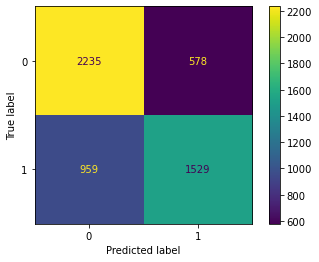

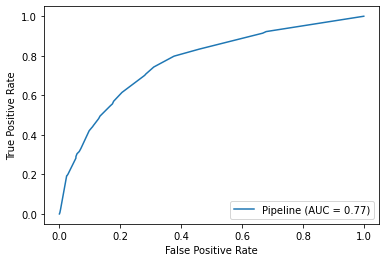

In [77]:
# Using pipline to instantiate Decision Tree
dt_final = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=14))
])

# Fitting model onto training data
dt_final.fit(X_train[used_cols], y_train)

# Making predictions on train and test data
train_preds = dt_final.predict(X_train[used_cols])
test_preds = dt_final.predict(X_test[used_cols])

# Calulating predict proba for both train and test
train_probas = dt_final.predict_proba(X_train[used_cols])[:,1]
test_probas = dt_final.predict_proba(X_test[used_cols])[:,1]

# Getting score, confusion matrix, and graph
evaluate(dt_final, X_train[used_cols], X_test[used_cols], y_train, y_test)

In [79]:
# Fitting model onto training data
dt_final.fit(X_hold[used_cols], y_hold)
dt_final.score(X_hold[used_cols], y_hold)

0.732078853046595

Our final model is a Decision Tree Classifier with a training accuracy score of 70.2% and a testing accuracy score of 71%. When testing this model on our holdout data we ended up with an accuracy score of 73%. This model fits our data very well. We are very confident that this model would do well on unseen data. This is the best model for our business problem and would lower false positives. Overall our model is 75% accurate.

##### Recursive Feature Elimination

This feature selection method is going to rank our top 5 features when it comes to determining whether or not one has received their vaccination.

In [72]:
# Setting a new X_train variable
X_train_pp = preprocessor.fit_transform(X_train)

# Instantiating RFE to build this model and fitting it on the data
selector = RFE(DecisionTreeClassifier(max_depth=5, min_samples_leaf=14), n_features_to_select=5, step=1)
selector = selector.fit(X_train_pp, y_train)
selector.support_

array([False,  True, False, False,  True, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False])

In [73]:
used_colss = num_columns + list(preprocessor.transformers_[1][1]['encoder'].get_feature_names(cat_columns))

# Showing the top 5 features with 1's beside them 
dict(zip(used_colss, selector.ranking_))

{'respondent_id': 5,
 'doctor_recc_seasonal': 1,
 'chronic_med_condition': 3,
 'child_under_6_months': 12,
 'health_worker': 1,
 'health_insurance': 4,
 'household_adults': 11,
 'household_children': 7,
 'age_group_35 - 44 Years': 14,
 'age_group_45 - 54 Years': 16,
 'age_group_55 - 64 Years': 1,
 'age_group_65+ Years': 1,
 'education_< 12 Years': 6,
 'education_College Graduate': 1,
 'education_Some College': 13,
 'race_Hispanic': 15,
 'race_Other or Multiple': 17,
 'race_White': 2,
 'sex_Male': 18,
 'income_poverty_Below Poverty': 10,
 'marital_status_Not Married': 8,
 'rent_or_own_Rent': 9,
 'employment_status_Unemployed': 19}

### Conclusion

According to our final model, we can determine if someone got their seasonal flu vaccine with 75% accuracy. Furthermore, in our data, we found several trends that could be useful to our employers. For instance, we found people with lower incomes were less likely to get vaccines, while older people and educated people were more likely to.

With this knowledge in mind, we would recommend our employers to advertise to middle-aged people and to make flu shots more available in low income areas.

This project was fascinating, and if we had had more time in the project, we would have taken some certain steps next. First, we would like to find a way to decrease the number of false positives in our model. This would reduce the number of people we think were vaccinated but actually are not.

We would also like to experiment with different feature combinations to see if we could create a better model. The last thing we would like to do is find a "convinceable target."

Some people will get a vaccine without any encourgament. Some will never get a vaccine despite how much encouragement they receive. However, there is a population that will get their vaccine with encouragement that would not without that help. By finding what charateristics make up this populaiton or 'convinceable target', we can reach out to them and have more people be vaccinated.